<a href="https://colab.research.google.com/github/harshithp2004/CustomerChurnPrediction_ANN/blob/main/CustomerChurnPrediction_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** **Libraries**

In [1]:
#import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
#load dataset
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Loading and Inspecting the Dataset**

In [2]:
#Columns in dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [3]:
#No. of rows & columns
df.shape

(10000, 14)

In [4]:
#To check null values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
#Get a summary of dataset information, including data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Display basic statistical details of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Exploratory Data Analysis(EDA)**

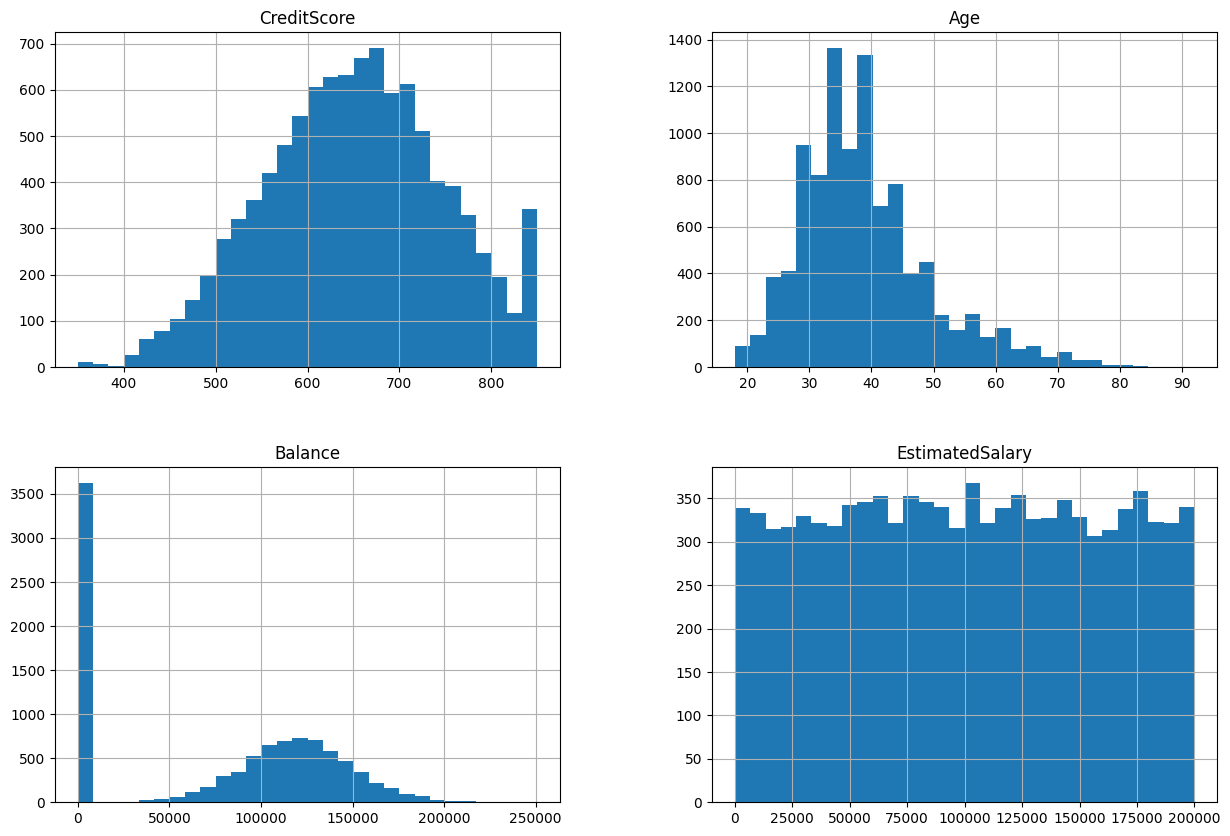

In [7]:
#Numerical features to examine their distributions
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].hist(bins=30, figsize=(15,10))
plt.show()


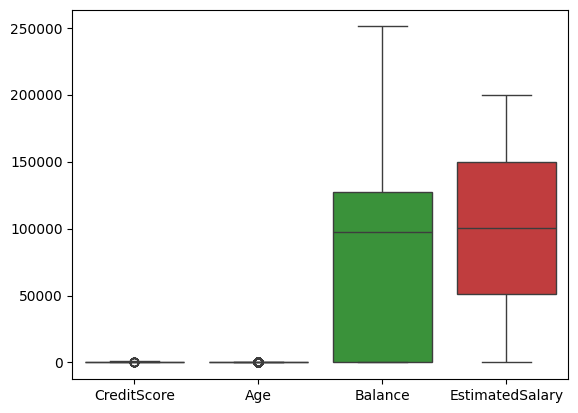

In [8]:
#To detect the outliers of Numerical Feature
sns.boxplot(data=df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])
plt.show()

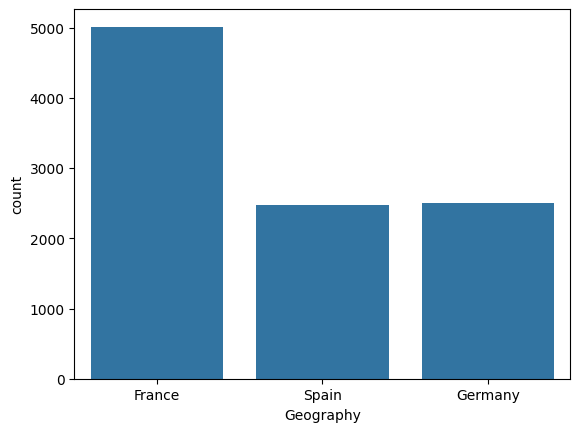

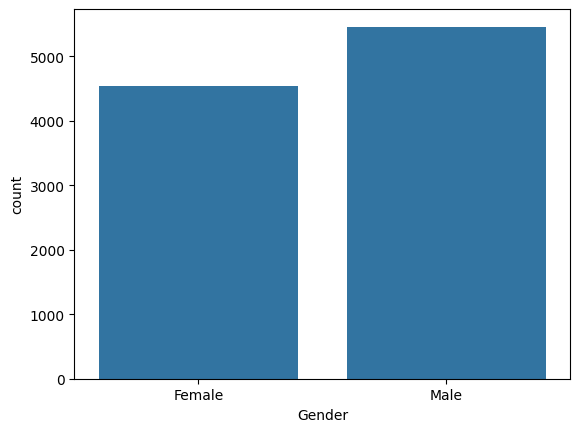

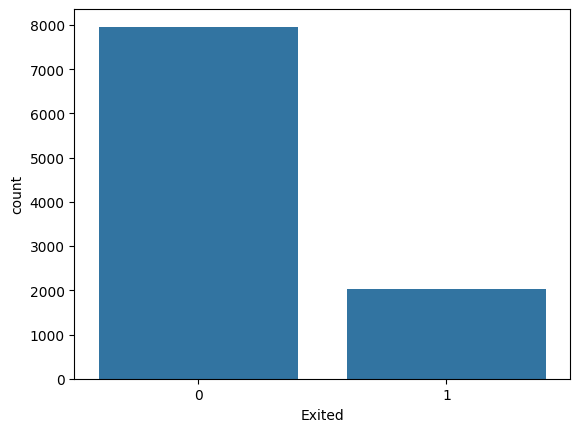

In [9]:
# Plot categorical distributions
sns.countplot(x='Geography', data=df)
plt.show()

sns.countplot(x='Gender', data=df)
plt.show()

sns.countplot(x='Exited', data=df)
plt.show()


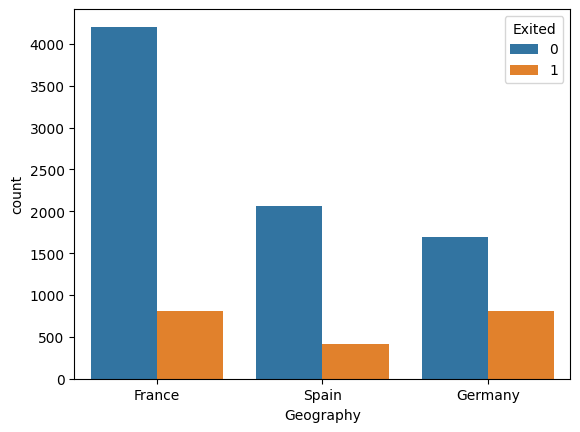

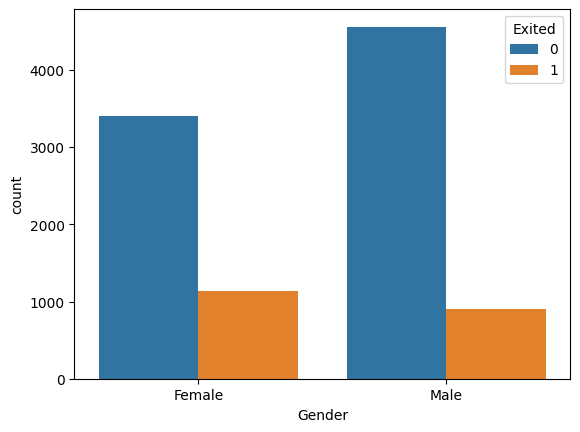

In [10]:
#how Exited varies with categorical features.
sns.countplot(x='Geography', hue='Exited', data=df)
plt.show()

sns.countplot(x='Gender', hue='Exited', data=df)
plt.show()


**Data Preprocessing**

In [11]:
#Drop unnecessary columns that don't provide value for model training
df=df.drop(columns=['RowNumber','CustomerId','Surname'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
#Separate input feature and target feature
input_data=df.drop(columns=['Exited'])
output_data=df['Exited']

In [13]:
input_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [14]:
output_data

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [15]:
#Convert categorical features into dummy variables for the model
input_data=pd.get_dummies(input_data)
input_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


**Scaling the Dataset**

In [16]:
#Standardize numerical data for improved model performance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)
#Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(input_data,output_data,test_size=0.20,random_state=0)
input_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,1.095988,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,1.095988,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,1.095988,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,1.095988,-1.095988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0.997204,-0.578736,-0.573809,-0.912419,0.912419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0.997204,-0.578736,-0.573809,-0.912419,0.912419
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,0.997204,-0.578736,-0.573809,1.095988,-1.095988
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,-1.002804,1.727904,-0.573809,-0.912419,0.912419


**Building the ANN Model**

In [30]:
#Import necessary libraries to build the ANN model
import tensorflow
from keras.layers import Dense,BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import L2
#Build the ANN model with hidden layers and regularization
ann=Sequential()
ann.add(Dense(8,input_dim=13,activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(6,activation='relu',kernel_regularizer=L2(l2=0.01)))
ann.add(BatchNormalization())
ann.add(Dense(4,activation='relu',kernel_regularizer=L2(l2=0.01)))
ann.add(BatchNormalization())
ann.add(Dense(2,activation='relu',kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(1,activation='sigmoid'))
#Compile the model with binary cross-entropy loss and accuracy metrics
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Train the model with early stopping to prevent overfitting
ann.fit(x_train,y_train,batch_size=100,epochs=64,validation_data=(x_test,y_test),callbacks=EarlyStopping())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/64
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.4905 - loss: 1.0238 - val_accuracy: 0.7615 - val_loss: 0.7685
Epoch 2/64
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6627 - loss: 0.7601 - val_accuracy: 0.7840 - val_loss: 0.7047
Epoch 3/64
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7722 - loss: 0.6732 - val_accuracy: 0.7990 - val_loss: 0.6513
Epoch 4/64
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7896 - loss: 0.6244 - val_accuracy: 0.7970 - val_loss: 0.6036
Epoch 5/64
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7919 - loss: 0.5861 - val_accuracy: 0.7980 - val_loss: 0.5601
Epoch 6/64
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7942 - loss: 0.5509 - val_accuracy: 0.7975 - val_loss: 0.5251
Epoch 7/64
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7939 - loss: 0.5202 - val_accuracy: 0.7975 - val_loss: 0.4978
Epoch 8/64
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7908 - loss: 0.4991 - val_accuracy: 0.7975 - val_

**Evaluating Model Performance**

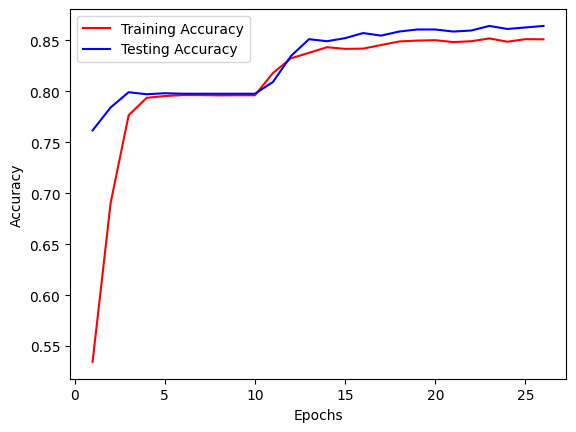

In [31]:
#Plot training and testing accuracy over epochs to evaluate model performance
train_accuracy=ann.history.history['accuracy']
test_accuracy=ann.history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs,train_accuracy,color='red',label='Training Accuracy')
plt.plot(epochs,test_accuracy,color='blue',label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Making Predictions**

In [19]:
#Predict on training data and convert predictions to binary labels
prd1=ann.predict(x_train)
prd_data1=[]
for i in prd1:
  if i[0]>0.5:
    prd_data1.append(1)
  else:
    prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
#Predict on test data and convert predictions to binary labels
prd2=ann.predict(x_test)
prd_data2=[]
for i in prd2:
  if i[0]>0.5:
    prd_data2.append(1)
  else:
    prd_data2.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [21]:
# Calculate accuracy on training and test sets
from sklearn.metrics import accuracy_score
accuracy_score(y_train,prd_data1)*100

85.5375

In [22]:
accuracy_score(y_test,prd_data2)*100

86.2

**Predicting for a New Customer**

In [23]:
#Predict the churn status for a new customer based on specific features
prediction=ann.predict(ss.transform(np.array([[619,42,2,0.00,1,1,1,101348,1, 0, 0, 1, 0]])))
prediction=(prediction>0.5)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[False]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
prediction=ann.predict(ss.transform(np.array([[608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0]])))
prediction=(prediction>0.5)
print(prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[False]]


In [25]:
prediction=ann.predict(ss.transform(np.array([[502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0]])))
prediction=(prediction>0.5)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[ True]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Interpreting the Model with SHAP**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
324/324 ━━━━

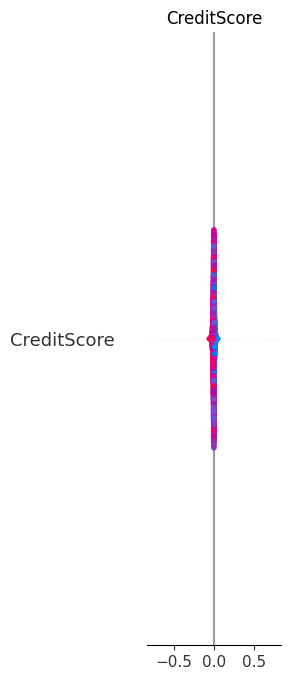

In [ ]:
import shap
# Sample a subset of the training data for the background to speed up calculations
background_sample = shap.sample(x_train, 5)  # Using 100 samples for background data
# Initialize the SHAP explainer with the smaller background sample
explainer = shap.KernelExplainer(ann.predict, background_sample)
# Calculate SHAP values for the test data
shap_values = explainer.shap_values(x_test)
# Plot feature importance based on SHAP values
shap.summary_plot(shap_values, x_test, plot_type="bar")

**Confusion Matrix**

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
 [[1549   46]
 [ 226  179]]


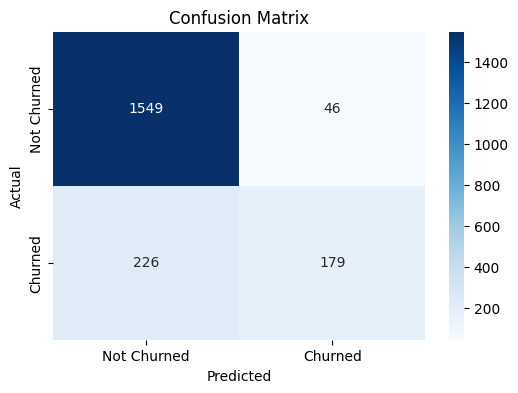

In [32]:
from sklearn.metrics import confusion_matrix
# Generate predictions on the test set
y_pred = (ann.predict(x_test) > 0.5).astype("int32")
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Classification Report**

In [33]:
from sklearn.metrics import classification_report
# Classification Report
class_report = classification_report(y_test, y_pred, target_names=["Not Churned", "Churned"])
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

 Not Churned       0.87      0.97      0.92      1595
     Churned       0.80      0.44      0.57       405

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



**THE END**